In [1]:
import pandas as pd
import numpy as np

In [152]:
import json

travel_file = open('travelRegionsRaw.json')

data = json.load(travel_file)


[{'ParentRegion': '',
  'Region': 'World',
  'u_name': '',
  'costPerWeek': '400',
  'jan': 'o',
  'feb': 'o',
  'mar': 'o',
  'apr': 'o',
  'may': 'o',
  'jun': 'o',
  'jul': 'o',
  'aug': 'o',
  'sep': 'o',
  'oct': 'o',
  'nov': 'o',
  'dec': 'o',
  'safety': 'o',
  'nature': 'o',
  'hiking': 'o',
  'beach': 'o',
  'watersports': 'o',
  'entertainment': 'o',
  'wintersports': 'o',
  'culture': 'o',
  'culinary': 'o',
  'architecture': 'o',
  'shopping': 'o',
  'budgetLevel': None,
  'visitorIndex': {'jan': 0,
   'feb': 0,
   'mar': 0,
   'apr': 0,
   'may': 0,
   'jun': 0,
   'jul': 0,
   'aug': 0,
   'sep': 0,
   'oct': 0,
   'nov': 0,
   'dec': 0},
  'isPeakSeason': {'jan': False,
   'feb': False,
   'mar': False,
   'apr': False,
   'may': False,
   'jun': False,
   'jul': False,
   'aug': False,
   'sep': False,
   'oct': False,
   'nov': False,
   'dec': False},
  'countries': ['ZAF',
   'CAF',
   'IOT',
   'ATF',
   'NOR',
   'FIN',
   'SWE',
   'DNK',
   'ISL',
   'FRO',
   '

In [545]:
df = pd.DataFrame(data['regions'])

In [550]:
df['Region'].values.tolist()

['World',
 'Europe',
 'North America',
 'Middle America and Caribbean',
 'South America',
 'Africa',
 'Asia',
 'Oceania',
 'Canada',
 'Canada North',
 'Canada British Columbia',
 'Canada Prairies',
 'Canada Ontario',
 'Canada Quebec',
 'Canada Atlantic Provinces',
 'Greenland',
 'USA',
 'USA Alaska',
 'USA Pacific Northwest',
 'USA California',
 'USA Southwest',
 'USA Rocky Mountains',
 'USA Great Plains',
 'USA Texas',
 'USA Midwest',
 'USA South',
 'USA Florida',
 'USA Mid-Atlantic',
 'USA New England',
 'USA Hawaii',
 'Mexico',
 'Mexico Baja California',
 'Northern Mexico',
 'Mexico Bajio and Central Mexico',
 'Mexico Pacific Coast',
 'Mexico Yucatan',
 'Middle America',
 'Guatemala and Belize',
 'Honduras and El Salvador',
 'Nicaragua',
 'Costa Rica',
 'Panama',
 'Caribbean',
 'Bahamas, Turks and Caicos Islands',
 'Cuba',
 'Greater Antilles without Cuba',
 'Lesser Antilles',
 'Venezuela',
 'Guianas',
 'Colombia',
 'Ecuador',
 'Peru',
 'Bolivia',
 'Brazil',
 'Brazil North',
 'Brazil

In [14]:
# -> parentRegion: encode region name into the number (could be the same aschii summation): either close or not close (binary step function needed)
# -> countries: same encoding for the country as for the region, just achii summation, however to get from elements to one number which will represent countries we 
# need to make a semantic meaning out of their combination, some kind of embedding is required here
# -> budget: from 0 to 100, easy to see which ones are close to each other
# -> months: individuals from 0 to 100, however embedding is recommended since position matters!
# -> characterics: same idea as for months 
# -> visitorIndex: same idea as for months 
# -> peakSeason: same idea, just take the indexes of the peakSeasons, and make an embedding
 

## Create enconding for the months encoding

In [123]:
import matplotlib.pyplot as plt  
import math 
import numpy 

In [124]:

def plot_polar(x, y):
    # Create a figure for the polar plot
    fig = plt.figure()
    
    # Create a polar subplot
    ax = fig.add_subplot(111, polar=True)
    
    # Convert Cartesian coordinates to polar coordinates
    theta = np.arctan2(y, x)  # Angle (in radians)
    r = np.sqrt(x**2 + y**2)  # Radius
    
    # Plot polar coordinates
    ax.plot(theta, r, marker='o', linestyle='-', color='b')
    
    # Set plot labels
    ax.set_title('Polar Plot of (x, y) Coordinates')
    
    # Show the plot
    plt.show()

In [185]:
def cyclic_encoding(obj):
    arr = np.array(obj, dtype=int)
    idx = arr.nonzero()[0]
    angles = (2 * np.pi * idx) / 22
    
    sin_values = np.sin(angles)
    cos_values = np.cos(angles)

    res = np.array([np.sum(sin_values), np.sum(cos_values)])
    return res


In [210]:
def full_cyclic_encoding(obj):
    arr = np.array(obj, dtype=float)
    idx = arr.nonzero()[0]
    angles = (2 * np.pi * idx) / 22
    
    sin_values = arr[idx] * np.sin(angles)
    cos_values = arr[idx] * np.cos(angles)

    res = np.array([np.sum(sin_values), np.sum(cos_values)])
    return res

In [209]:
l = [0, 0, 0.25, 0.5, 0]
arr = np.array(l, dtype=float)
idx = arr.nonzero()[0]
sin_values = np.sin(idx)
arr[idx] * sin_values

array([0.22732436, 0.07056   ])

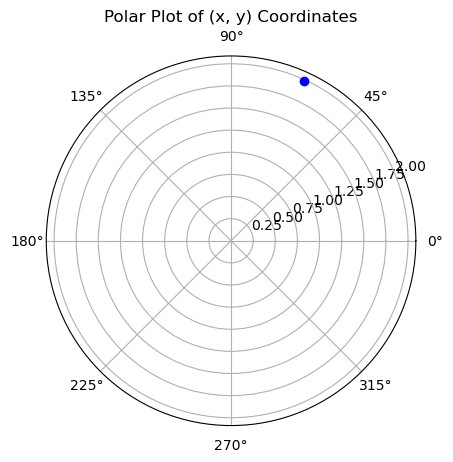

In [131]:
arr = cyclic_encoding([False, True, True, False, False, False, False, False, False, False, False, False])
plot_polar(arr[0], arr[1])

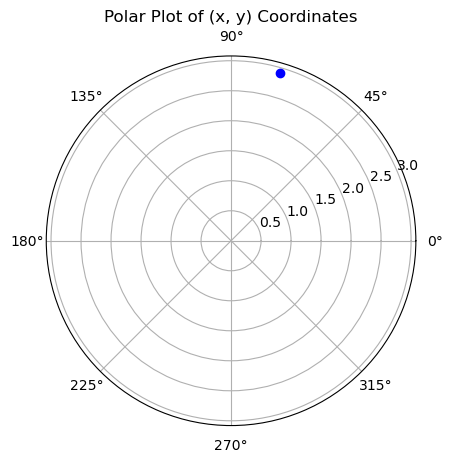

In [129]:
arr = cyclic_encoding([True, True, True, False, False, False, False, False, False, False, False, False])
plot_polar(arr[0], arr[1])

In [179]:
def tranform_to_01(data):
    return list(map(lambda x: int(x), data.values()))

#### Peak Season Embeddding

In [187]:
peakSeason_emb = df['isPeakSeason'].map(tranform_to_01).map(cyclic_encoding)
peakSeason_emb

0                                     [0.0, 0.0]
1                                     [0.0, 0.0]
2                                     [0.0, 0.0]
3                                     [0.0, 0.0]
4                                     [0.0, 0.0]
                         ...                    
192     [2.2862118336907886, 1.6384291050497513]
193     [1.2963903918098558, 0.1863927988858961]
194     [1.2963903918098558, 0.1863927988858961]
195    [0.9096319953545184, -0.4154150130018863]
196    [1.0374821311956879, -1.6143537075597825]
Name: isPeakSeason, Length: 197, dtype: object

#### Months embedding

In [189]:
months_features = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep" ,"oct", "nov", "dec"]

def tranform_to_01_int(num):
    if num == '++': 
        return 1
    elif num == '+':
        return .75
    elif num == 'o':
        return .50
    elif num == '-':
        return .25
    else:
        return 0

In [506]:
months_df = df[months_features]

months_df = months_df.fillna('--').map(tranform_to_01_int)
months_emb = months_df.apply(full_cyclic_encoding, axis=1)
months_emb

0                       [3.4775763858867372, 0.0]
1                                      [0.0, 0.0]
2                                      [0.0, 0.0]
3                                      [0.0, 0.0]
4                                      [0.0, 0.0]
                          ...                    
192    [6.274696068890354, -0.060754163792626215]
193                                    [0.0, 0.0]
194                                    [0.0, 0.0]
195                                    [0.0, 0.0]
196                                    [0.0, 0.0]
Length: 197, dtype: object

In [274]:
def transform_to_array(row):
    return list(row.values())

In [282]:
from sklearn.preprocessing import MinMaxScaler

In [505]:
visitorIndex_df = df['visitorIndex'].apply(transform_to_array)
visitorIndex_x = np.array([np.array(row) for row in visitorIndex_df.values])
visitorIndex_x = MinMaxScaler().fit_transform(visitorIndex_x)

# months_emb = months_df.apply(full_cyclic_encoding, axis=1)
# months_emb
visitorIndex_emb = np.apply_along_axis(full_cyclic_encoding, 1, visitorIndex_x)
# visitorIndex_emb = pd.DataFrame(visitorIndex_emb)

,0,1
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
192,0.674120,0.056668
193,0.262612,-0.010702
194,0.262612,-0.010702
195,0.781190,0.018412


#### Budget Level

In [295]:
budgetLevel_emb = df['budgetLevel'].fillna(0).apply(lambda x: x /100)
budgetLevel_emb

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
192    0.1
193    0.1
194    0.1
195    0.6
196    0.4
Name: budgetLevel, Length: 197, dtype: float64

#### Parent region

In [316]:
x = "Moldova"
sum(memoryview(bytes(x.encode())).tolist())

722

In [346]:
parentRegion_emb = df['ParentRegion'].apply(lambda x: sum(memoryview(bytes(x.encode())).tolist()))
parentRegion_emb

0         0
1       520
2       520
3       520
4       520
       ... 
192    1512
193    1512
194    1512
195    1512
196    1512
Name: ParentRegion, Length: 197, dtype: int64

#### Preferences Embedding

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [161]:
features = ["safety", "nature", "hiking", "beach", "watersports", "entertainment", "wintersports", "culture", "culinary", "architecture", "shopping"]


def transform_to_num(num):
    if num == '++': 
        return 100
    elif num == '+':
        return 75
    elif num == 'o':
        return 50
    elif num == '-':
        return 25
    else:
        return 0

In [452]:
preferences_df = df[features]

preferences_df = preferences_df.fillna('--').map(transform_to_num)

In [453]:
preferences_df

,safety,nature,hiking,beach,watersports,entertainment,wintersports,culture,culinary,architecture,shopping
0,50,50,50,50,50,50,50,50,50,50,50
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,0,50,50,75,50,75,0,50,50,50,25
193,0,50,50,75,50,50,0,75,75,75,25
194,0,75,75,75,75,50,0,75,50,50,25
195,0,50,50,75,50,50,50,100,75,75,50


In [457]:
x = preferences_emb.values.flatten()
x = preferences_df.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

array([[ 0.68194043, -0.09092698,  0.41164146, ...,  0.38347826,
         0.46457773,  0.80823945],
       [-0.83605126, -1.79689041, -1.33230192, ..., -1.68625373,
        -1.19945524, -1.16968815],
       [-0.83605126, -1.79689041, -1.33230192, ..., -1.68625373,
        -1.19945524, -1.16968815],
       ...,
       [-0.83605126,  0.76205473,  1.28361315, ...,  0.38347826,
         0.46457773, -0.18072435],
       [-0.83605126, -0.09092698,  0.41164146, ...,  1.41834425,
         1.29659422,  0.80823945],
       [-0.83605126, -0.9439087 ,  0.41164146, ...,  0.38347826,
         0.46457773, -0.18072435]])

In [469]:
pca = PCA(n_components=1)
preferences_pca = pca.fit_transform(x)
preferences_emb = pd.DataFrame(data = principalComponents
             , columns = ['preferences'])

preferences_emb.values.flatten().shape


(197,)

In [470]:
from sklearn.preprocessing import MinMaxScaler

In [481]:
pref_flatten = preferences_emb.values.flatten()
pref_flatten = pref_flatten.reshape(pref_flatten.size, 1)
pref_emb = MinMaxScaler().fit_transform(pref_flatten)
pref_emb

array([[0.62807145],
       [0.01883794],
       [0.01883794],
       [0.01883794],
       [0.01883794],
       [0.01883794],
       [0.01883794],
       [0.01883794],
       [0.00470949],
       [0.16448436],
       [0.91352136],
       [0.50644126],
       [0.66880534],
       [0.74515343],
       [0.71261433],
       [0.29176786],
       [0.00470949],
       [0.44005552],
       [0.74866591],
       [1.        ],
       [0.4026029 ],
       [0.42978839],
       [0.15928052],
       [0.60072712],
       [0.76809582],
       [0.88675983],
       [0.89988154],
       [0.81027589],
       [0.74697626],
       [0.6980619 ],
       [0.00941897],
       [0.53170192],
       [0.21399654],
       [0.65113204],
       [0.47103111],
       [0.66570819],
       [0.01883794],
       [0.51272095],
       [0.57762908],
       [0.46632162],
       [0.62674284],
       [0.63538016],
       [0.00941897],
       [0.50448803],
       [0.52539982],
       [0.59342367],
       [0.57760814],
       [0.621

#### Countries Embdedding

In [354]:
countries_emb = df['countries'].apply(lambda y: [sum(memoryview(bytes(x.encode())).tolist()) for x in y])
countries_emb

0      [225, 202, 236, 219, 239, 221, 239, 221, 232, ...
1      [202, 236, 219, 239, 221, 239, 221, 232, 231, ...
2      [210, 229, 233, 234, 210, 210, 236, 210, 210, ...
3      [232, 232, 218, 245, 218, 222, 223, 221, 216, ...
4      [233, 222, 221, 231, 221, 213, 215, 202, 251, ...
                             ...                        
192                                                [232]
193                                                [246]
194                                                [246]
195                                                [251]
196                                                [236]
Name: countries, Length: 197, dtype: object

# Simularity Indexes

Lets start with the simplest and go to the more complex embeddings

In [330]:
def create_simularity_matrix(embedding, fx):
    simularity_idx = np.zeros((embedding.size, embedding.size))

    for id_x, x in enumerate(embedding):
        for id_y, y in enumerate(embedding):
            simularity_idx[id_x][id_y]= fx(x, y)

    return simularity_idx

In [351]:
def create_permutation_array(embedding):
    x, y = np.meshgrid(embedding, embedding, indexing='ij')
    arr = np.stack((x, y), axis=-1)
    return arr

In [352]:
# create_permutation_array([1, 2, 3])

array([[[1, 1],
        [1, 2],
        [1, 3]],

       [[2, 1],
        [2, 2],
        [2, 3]],

       [[3, 1],
        [3, 2],
        [3, 3]]])


#### Budget Level 

We will make the simularity measure based on the absolute distance 

In [322]:
def distance_sim(ri, rj):
    return 1 - np.abs(ri - rj)

In [332]:
budget_sim = create_simularity_matrix(budgetLevel_emb, distance_sim)
budget_sim

array([[1. , 1. , 1. , ..., 0.9, 0.4, 0.6],
       [1. , 1. , 1. , ..., 0.9, 0.4, 0.6],
       [1. , 1. , 1. , ..., 0.9, 0.4, 0.6],
       ...,
       [0.9, 0.9, 0.9, ..., 1. , 0.5, 0.7],
       [0.4, 0.4, 0.4, ..., 0.5, 1. , 0.8],
       [0.6, 0.6, 0.6, ..., 0.7, 0.8, 1. ]])

#### Parent Region 

For the parent region we check if they are the same or not. We can use a step function to do it. 

In [327]:
def step_simularity(ri, rj):
    return 1 if ri == rj else 0

In [347]:
parentRegion_emb[196], parentRegion_emb[195]

(1512, 1512)

In [350]:
parentRegion_sim = create_simularity_matrix(parentRegion_emb, step_simularity)


pd.DataFrame(parentRegion_sim).head(10)

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Countries 

Countries simularity is little more complex, however, this is still a combination of regions. 

In [362]:
new_set = set(['apple', 'pineapple', 'apple'])
new_set.add('apple')

len(new_set)

2

In [396]:
def jaccard_similarity(ri, rj):
    """
    Accepts two distinct arrays/list
    """ 
    union = set(ri)
    intersection_size = 0
    for x in set(rj):
        prev_size = len(union)
        union.add(x)
        if prev_size == len(union):
            intersection_size += 1
    return (intersection_size / len(union))

In [397]:
countries_emb

0      [225, 202, 236, 219, 239, 221, 239, 221, 232, ...
1      [202, 236, 219, 239, 221, 239, 221, 232, 231, ...
2      [210, 229, 233, 234, 210, 210, 236, 210, 210, ...
3      [232, 232, 218, 245, 218, 222, 223, 221, 216, ...
4      [233, 222, 221, 231, 221, 213, 215, 202, 251, ...
                             ...                        
192                                                [232]
193                                                [246]
194                                                [246]
195                                                [251]
196                                                [236]
Name: countries, Length: 197, dtype: object

In [398]:
jaccard_similarity(countries_emb[0], countries_emb[0])

1.0

In [400]:
countries_sim = create_simularity_matrix(countries_emb, jaccard_similarity)
countries_sim


array([[1.        , 0.57777778, 0.2       , ..., 0.02222222, 0.02222222,
        0.02222222],
       [0.57777778, 1.        , 0.25      , ..., 0.03846154, 0.03846154,
        0.03846154],
       [0.2       , 0.25      , 1.        , ..., 0.        , 0.        ,
        0.11111111],
       ...,
       [0.02222222, 0.03846154, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02222222, 0.03846154, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02222222, 0.03846154, 0.11111111, ..., 0.        , 0.        ,
        1.        ]])

#### Peak Season  

We will use Eucleadean distance here as well, with formula:
$d = \sqrt{(x_1 - x_2)^2 - (y_1 - y_2)^2}$

In [403]:
peakSeason_emb

0                                     [0.0, 0.0]
1                                     [0.0, 0.0]
2                                     [0.0, 0.0]
3                                     [0.0, 0.0]
4                                     [0.0, 0.0]
                         ...                    
192     [2.2862118336907886, 1.6384291050497513]
193     [1.2963903918098558, 0.1863927988858961]
194     [1.2963903918098558, 0.1863927988858961]
195    [0.9096319953545184, -0.4154150130018863]
196    [1.0374821311956879, -1.6143537075597825]
Name: isPeakSeason, Length: 197, dtype: object

In [415]:
def eucleadean_d(ri, rj):
    d = np.sqrt((ri[0] - rj[0]) ** 2 + (ri[1] - rj[1]) ** 2)
    return d 

In [511]:
def create_simularity_from_distance(embedding):
    distances = np.zeros((embedding.shape[0], embedding.shape[0]))

    for id_x, x in enumerate(embedding):
        for id_y, y in enumerate(embedding):
            distances[id_x][id_y]= eucleadean_d(x, y)

    max_d = np.max(distances)


    return 1 - (distances / max_d)

In [514]:
peakSeason_sim = create_simularity_from_distance(peakSeason_emb)
peakSeason_sim

array([[1.        , 1.        , 1.        , ..., 0.7776183 , 0.83020687,
        0.67416938],
       [1.        , 1.        , 1.        , ..., 0.7776183 , 0.83020687,
        0.67416938],
       [1.        , 1.        , 1.        , ..., 0.7776183 , 0.83020687,
        0.67416938],
       ...,
       [0.7776183 , 0.7776183 , 0.7776183 , ..., 1.        , 0.87853504,
        0.69110148],
       [0.83020687, 0.83020687, 0.83020687, ..., 0.87853504, 1.        ,
        0.79527429],
       [0.67416938, 0.67416938, 0.67416938, ..., 0.69110148, 0.79527429,
        1.        ]])

#### Months  

Months were calculated in the same way as peakSeasons, so simularity will be calculated in the same way

In [515]:
months_sim = create_simularity_from_distance(months_emb)

#### Visitor Index 

Same measurement with the visitor indexes

In [516]:
visitorIndex_sim = create_simularity_from_distance(visitorIndex_emb)
visitorIndex_sim.shape

(197, 197)

#### Preferences 

Preferences simularity is simular to the budget here.

In [485]:
pref_sim = create_simularity_matrix(pref_emb.reshape(pref_emb.size), distance_sim)
pref_sim

array([[1.        , 0.39076649, 0.39076649, ..., 0.91410958, 0.82162443,
        0.99600728],
       [0.39076649, 1.        , 1.        , ..., 0.30487606, 0.21239092,
        0.39475921],
       [0.39076649, 1.        , 1.        , ..., 0.30487606, 0.21239092,
        0.39475921],
       ...,
       [0.91410958, 0.30487606, 0.30487606, ..., 1.        , 0.90751485,
        0.91011685],
       [0.82162443, 0.21239092, 0.21239092, ..., 0.90751485, 1.        ,
        0.81763171],
       [0.99600728, 0.39475921, 0.39475921, ..., 0.91011685, 0.81763171,
        1.        ]])

### Total simularity 

For now, the total simularity matrix is the mean over all simularities. Later weighed simularity could be added

In [517]:
assert(budget_sim.shape == (197, 197))
assert(parentRegion_sim.shape == (197, 197))
assert(countries_sim.shape == (197, 197))
assert(months_sim.shape == (197, 197))
assert(pref_sim.shape == (197, 197))
assert(visitorIndex_sim.shape == (197, 197))

In [518]:
total_simularity = (budget_sim + parentRegion_sim + countries_sim + peakSeason_sim + months_sim + pref_sim + visitorIndex_sim) / 7

In [556]:
df['Region'].values.flatten().tolist()

['World',
 'Europe',
 'North America',
 'Middle America and Caribbean',
 'South America',
 'Africa',
 'Asia',
 'Oceania',
 'Canada',
 'Canada North',
 'Canada British Columbia',
 'Canada Prairies',
 'Canada Ontario',
 'Canada Quebec',
 'Canada Atlantic Provinces',
 'Greenland',
 'USA',
 'USA Alaska',
 'USA Pacific Northwest',
 'USA California',
 'USA Southwest',
 'USA Rocky Mountains',
 'USA Great Plains',
 'USA Texas',
 'USA Midwest',
 'USA South',
 'USA Florida',
 'USA Mid-Atlantic',
 'USA New England',
 'USA Hawaii',
 'Mexico',
 'Mexico Baja California',
 'Northern Mexico',
 'Mexico Bajio and Central Mexico',
 'Mexico Pacific Coast',
 'Mexico Yucatan',
 'Middle America',
 'Guatemala and Belize',
 'Honduras and El Salvador',
 'Nicaragua',
 'Costa Rica',
 'Panama',
 'Caribbean',
 'Bahamas, Turks and Caicos Islands',
 'Cuba',
 'Greater Antilles without Cuba',
 'Lesser Antilles',
 'Venezuela',
 'Guianas',
 'Colombia',
 'Ecuador',
 'Peru',
 'Bolivia',
 'Brazil',
 'Brazil North',
 'Brazil

In [559]:
total_sim = pd.DataFrame(total_simularity)
total_sim.to_json('similarityMatrix.json', orient='values')

In [563]:
import json
# pd.DataFrame().to_json('similarityKeys.json')
keys = df['Region'].values.flatten().tolist()
values = {}
for idx, val in enumerate(keys):
    values[val] = idx 


with open('similarityKeys.json', 'w') as f:
    json.dump(values, f)

In [536]:
print("Min value:", total_simularity.min())
print("Max value:", total_simularity.max())

Min value: 0.12709576315633137
Max value: 1.0


### Visualize result

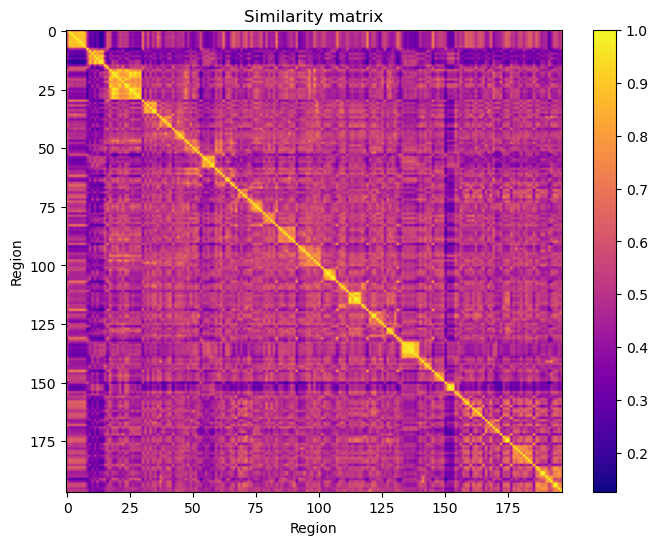

In [542]:
assert(len(total_simularity) == 197)
import seaborn as sns 
import matplotlib.pyplot as plt 

total_simularity = np.array(total_simularity)

plt.figure(figsize=(8, 6))
# sns.heatmap(total_simularity, annot=True, cmap='viridis')
plt.imshow(total_simularity, cmap='plasma', aspect='auto') 
plt.colorbar()  # Show color scale
plt.title('Similarity matrix') 
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()